# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv(r"C:\Users\limon.DESKTOP-D4OD6GD\OneDrive\Desktop\Навчання\python\yulu_bike_sharing_dataset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [6]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

In [33]:
monthly_stats = df.groupby('month_year')['count'].agg(['mean', 'std']).reset_index()

monthly_stats['lower'] = monthly_stats['mean'] - monthly_stats['std']
monthly_stats['upper'] = monthly_stats['mean'] + monthly_stats['std']

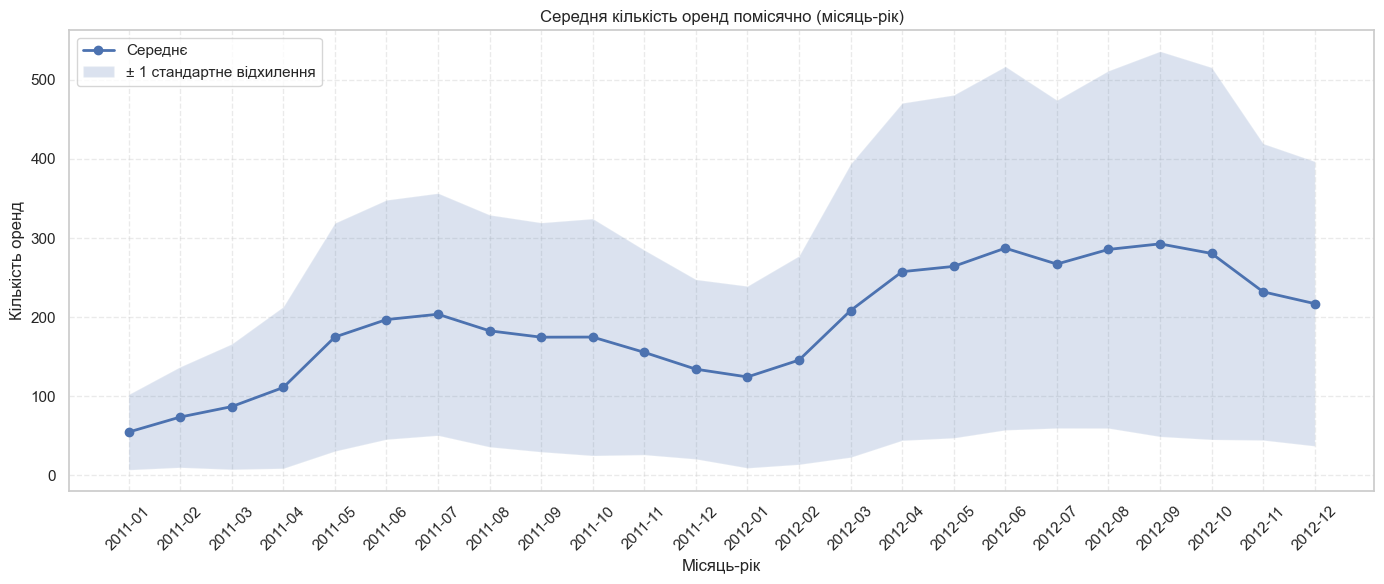

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(monthly_stats['month_year'],
         monthly_stats['mean'],
         marker='o',
         linewidth=2,
         label='Середнє')

plt.fill_between(monthly_stats['month_year'],
                 monthly_stats['lower'],
                 monthly_stats['upper'],
                 alpha=0.2,
                 label='± 1 стандартне відхилення')

plt.title('Середня кількість оренд помісячно (місяць-рік)')
plt.xlabel('Місяць-рік')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()

Найбільша невизначеність спостерігається у тих місяцях, де стандартне відхилення максимальне, що свідчить про значні коливання попиту на оренду велосипедів у цей період.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

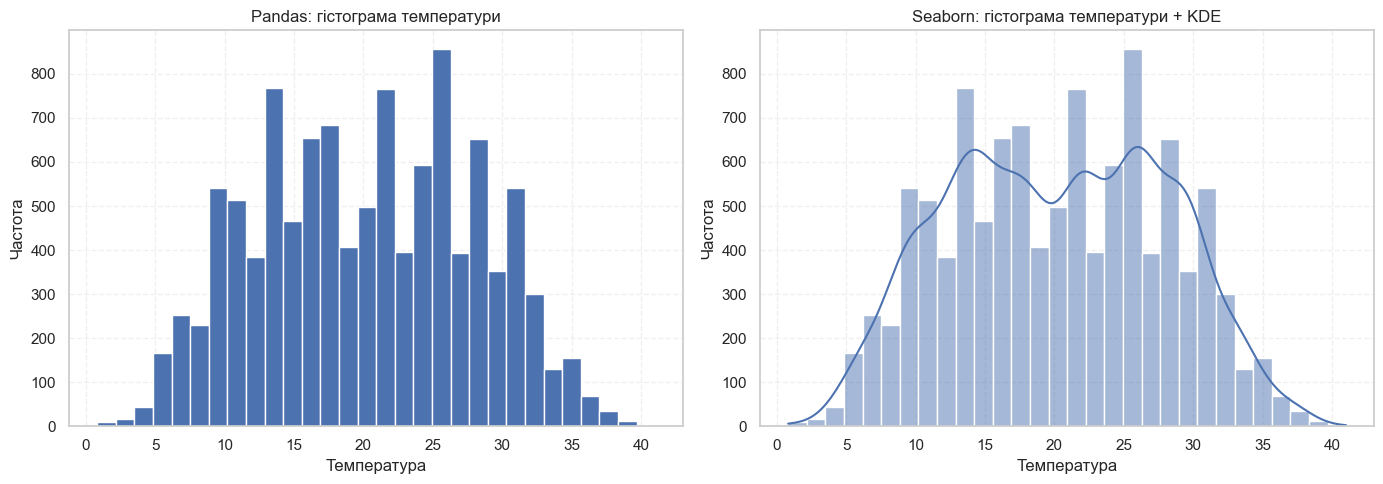

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = 30  

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1) Pandas
df["temp"].plot(kind="hist", bins=bins, ax=ax[0])
ax[0].set_title("Pandas: гістограма температури")
ax[0].set_xlabel("Температура")
ax[0].set_ylabel("Частота")
ax[0].grid(True, linestyle="--", alpha=0.3)

#  Seaborn 
sns.histplot(data=df, x="temp", bins=bins, kde=True, ax=ax[1])
ax[1].set_title("Seaborn: гістограма температури + KDE")
ax[1].set_xlabel("Температура")
ax[1].set_ylabel("Частота")
ax[1].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

Pandas — простіший “базовий” вигляд, мінімум оформлення.

Seaborn — більш “пригладжений” стиль (кращі дефолтні налаштування), плюс легко додати додаткові елементи (як KDE), зазвичай виглядає більш презентабельно для звіту.

Ця лінія називається KDE (Kernel Density Estimation).

- це згладжена крива розподілу, яка показує де значення трапляються найчастіше;

- вона допомагає побачити форму розподілу без “ступінчастості” бінів (піки, спади, можливі кілька піків).

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

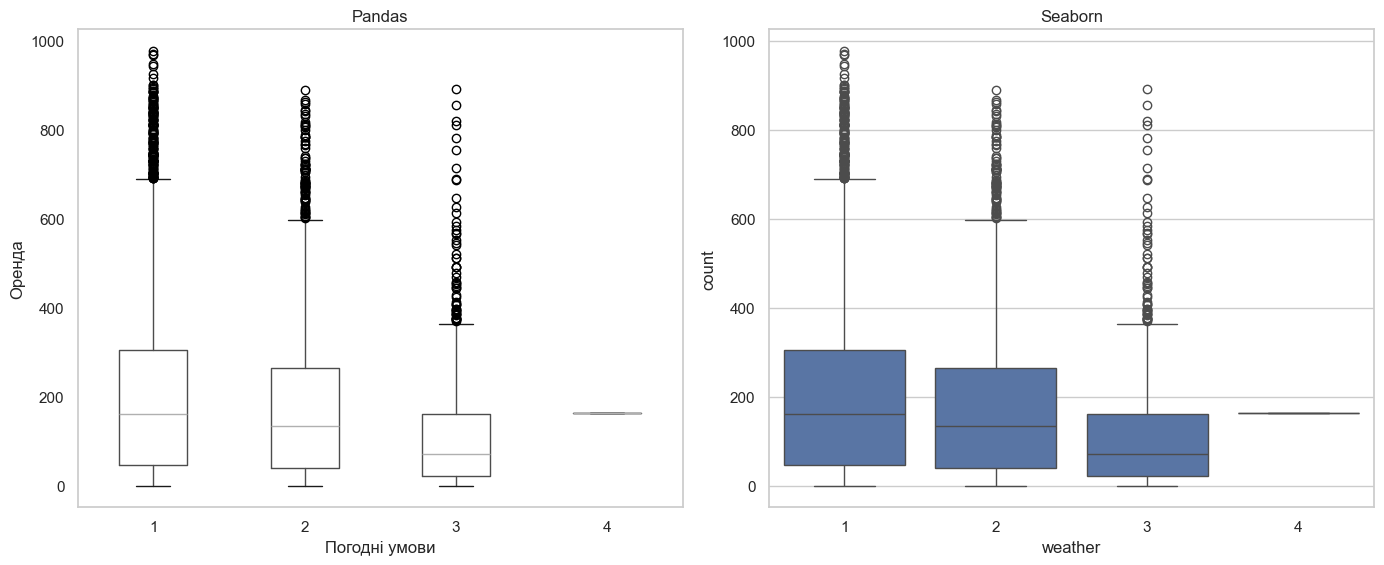

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pandas
df.boxplot(column='count', by='weather', ax=ax[0], grid=False)
ax[0].set_title('Pandas Boxplot')
ax[0].set_xlabel('Погодні умови')
ax[0].set_ylabel('Оренда')
ax[0].set_title('Pandas')

# Seaborn
sns.boxplot(data=df, x='weather', y='count', ax=ax[1])
ax[1].set_title('Seaborn')

plt.suptitle('')
plt.tight_layout()
plt.show()

Pandas boxplot — базовий, простіший стиль.
Seaborn — більш сучасний дизайн, кращі кольори та автоматичне форматування.

Seaborn краще працює з категоріальними змінними
Pandas швидкий для простого аналізу

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [ ]:
correlation = df[['count', 'temp', 'atemp', 'weather']].corr()
correlation


,count,temp,atemp,weather
count,1.000000,0.394454,0.389784,-0.128655
temp,0.394454,1.000000,0.984948,-0.055035
atemp,0.389784,0.984948,1.000000,-0.055376
weather,-0.128655,-0.055035,-0.055376,1.000000


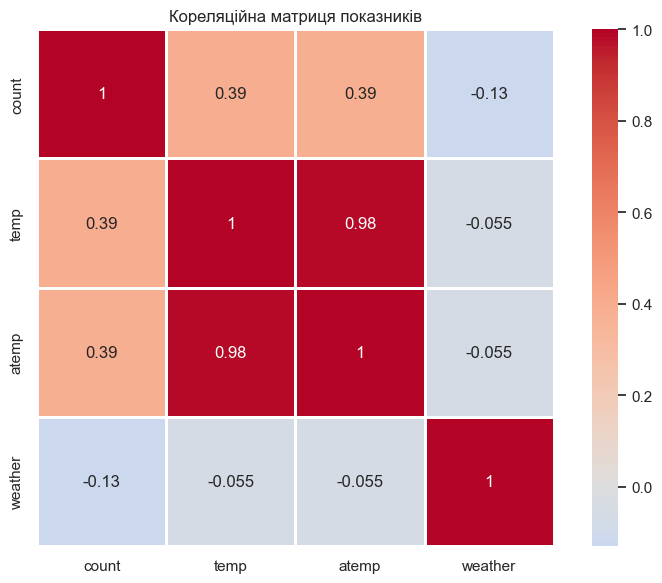

In [12]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

1. З матриці:

- temp - 0.39

- atemp - 0.39

- weather - -0.13

 Найсильніша позитивна кореляція з count — це temp та atemp (≈ 0.39).
 
2. temp - atemp = 0.98

temp — реальна температура

atemp — відчутна температура (відчувається як)

Вони розраховуються з одних і тих самих фізичних показників, тому майже ідентичні.

3. З матриці видно:
weather - count = -0.13

weather - temp ≈ -0.055

weather - atemp ≈ -0.055

    Негативна кореляція означає:
Коли погодні умови "гірші" (вищий код weather — дощ, сніг тощо),
кількість оренд зменшується.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


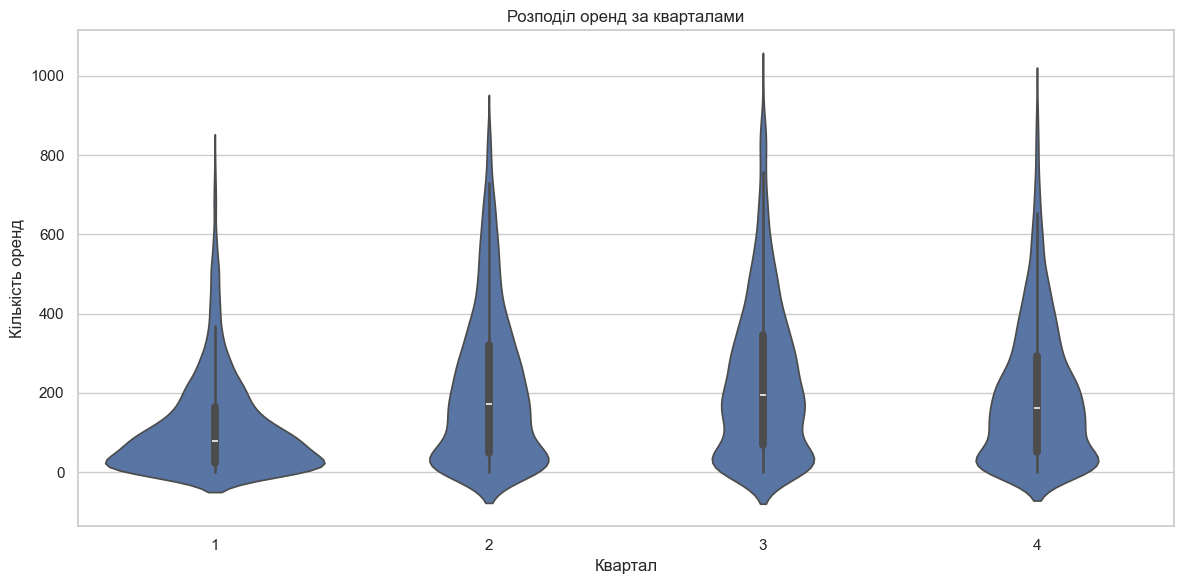

In [17]:
df["quarter"] = df.index.quarter

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df,
    x='quarter',
    y='count'
)

plt.title('Розподіл оренд за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

1. Товщина violin plot відображає щільність розподілу значень — де даних більше, графік ширший.

2. Найбільша варіабельність спостерігається у 3 кварталі.

3. Violin plot має перевагу над box plot, оскільки показує повну форму розподілу та щільність даних, а не лише медіану та квартилі.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

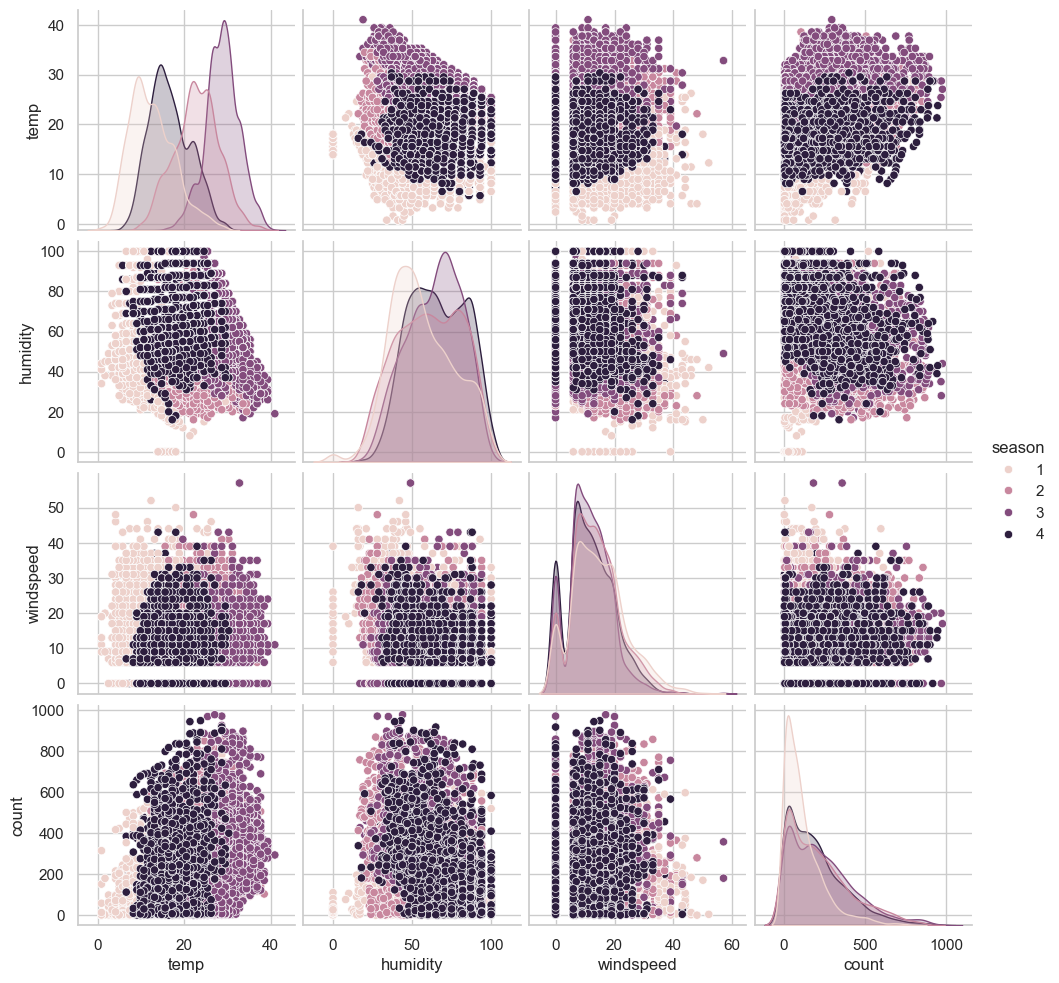

In [24]:
sns.pairplot(
    df,
    vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season'
)
plt.show()

1. Найчіткіший зв’язок: temp - count

На нижньому рядку (count vs temp):

- видно явний висхідний тренд

- при зростанні температури кількість оренд збільшується

- точки формують більш-менш лінійну структуру

- Це найвиразніший лінійний зв’язок на всій матриці.

Найсильніше між кварталами відрізняється саме temp

На діагоналі (розподіл temp) видно чітке розділення кольорів,
квартали мають різні температурні діапазони та 
сезон 3 і 4 мають значно вищі температури.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

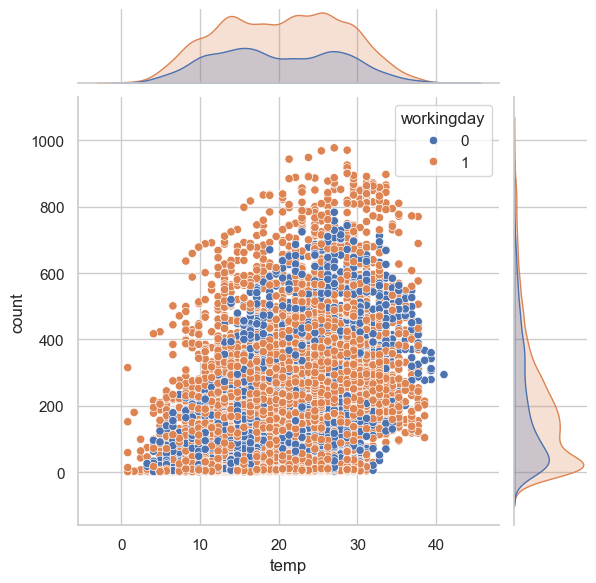

In [25]:
sns.jointplot(data=df, x="temp", y="count", hue="workingday");

1. Графіки по краях відображають маргінальні розподіли температури та кількості оренд окремо для робочих і неробочих днів.

2. Існує помітна різниця в поведінці користувачів: у робочі дні кількість оренд вища, що свідчить про використання велосипедів для щоденних поїздок на роботу.
